In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df=pd.read_csv(r"C:\ml\da\List of Countries by Sugarcane Production.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)


data cleaning

In [240]:
df.dropna(inplace=True)

In [241]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.',"").str.replace(",","").astype('float')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(",","").astype('float')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.',"").str.replace(".","").astype('float')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(",","").astype('float')

In [243]:
df.sort_values(by='Production (Tons)',ascending=False,inplace=True)
df.head()


,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3.668531,10226205.0,75.1675
1,India,Asia,348448000.0,260721.000000,4950000.0,70.3935
2,China,Asia,123059739.0,88287.000000,1675215.0,73.4591
3,Thailand,Asia,87468496.0,1.264303,1336575.0,65.4422
4,Pakistan,Asia,65450704.0,324219.000000,1130820.0,57.8790


In [244]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112652.907671,2.498981e+05,56.190931
std,8.419149e+07,176841.911118,1.137003e+06,27.569322
min,1.000000e+00,0.000000,0.000000e+00,5.577800
25%,6.251875e+04,1304.000000,1.104000e+03,36.809325
50%,1.440044e+06,25572.500000,1.655800e+04,55.679950
75%,6.426824e+06,146384.750000,8.047400e+04,73.706675
max,7.686784e+08,951087.000000,1.022620e+07,129.049300


univarite analysis


C:\Users\preeti\AppData\Local\Temp\ipykernel_960\1646310364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'])
C:\Users\preeti\AppData\Local\Temp\ipykernel_960\1646310364.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person (Kg)'])
C:\Users\pree

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

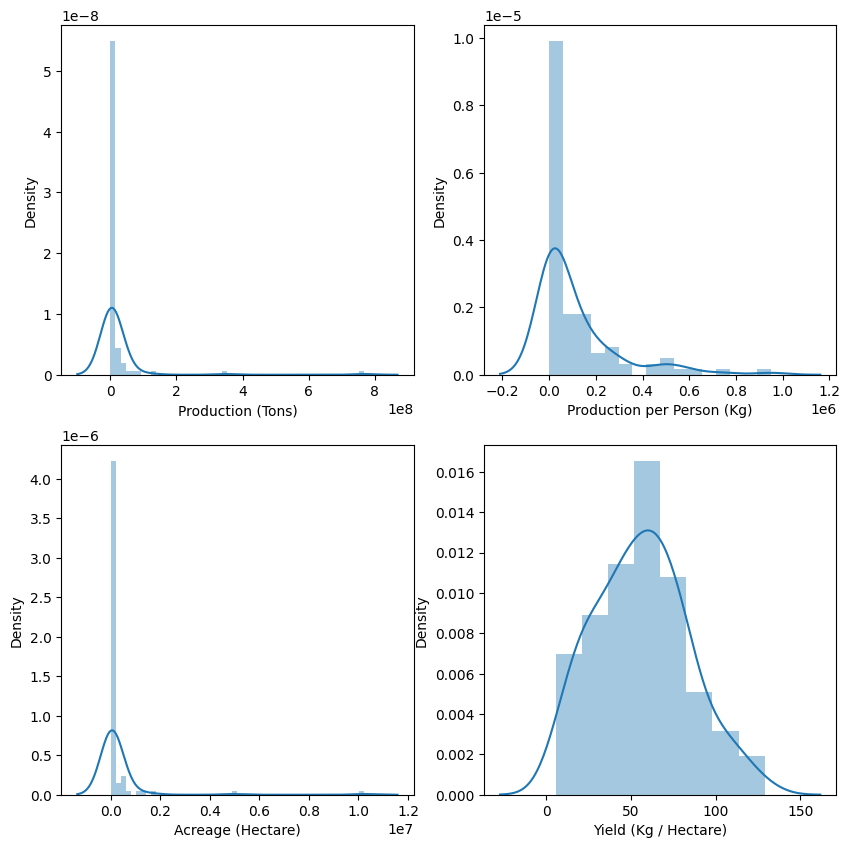

In [183]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage (Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield (Kg / Hectare)'])


outlier

<Axes: >

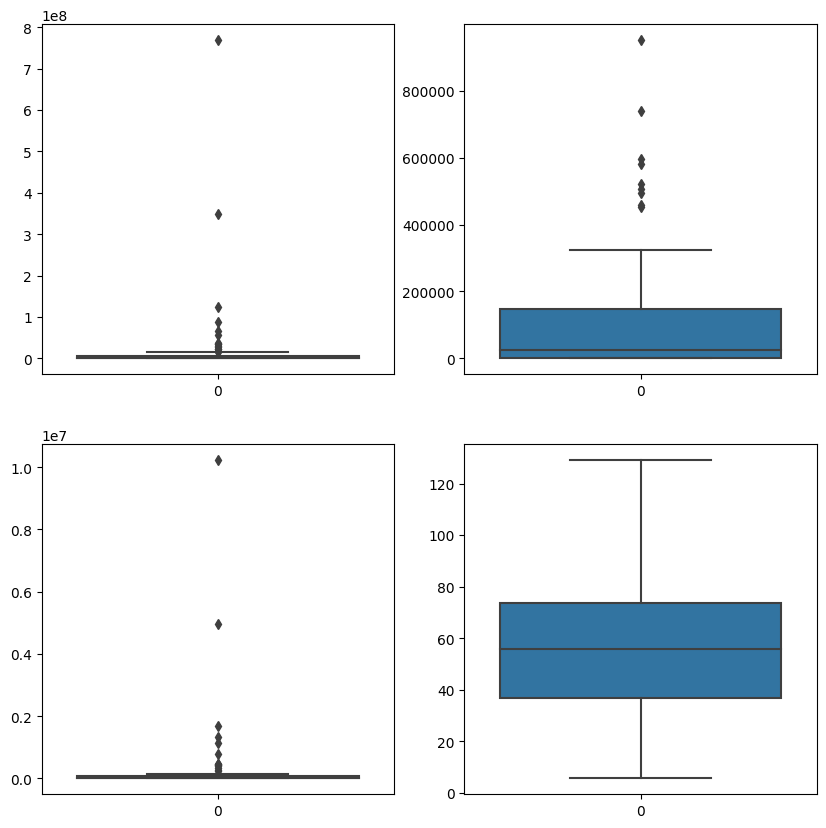

In [184]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage (Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield (Kg / Hectare)'])

In [185]:
#maximum sugar production
df[df['Production (Tons)']==(df['Production (Tons)'].max())]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3.668531,10226205.0,75.1675


In [209]:
df_new=df[['Production (Tons)','Production per Person (Kg)','Acreage (Hectare)','Yield (Kg / Hectare)']].set_index(df['Country'])


In [217]:
df_new.sort_values(by='Production (Tons)',ascending=False,inplace=True)
df_new


,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Country,,,,
Brazil,768678382.0,3.668531,10226205.0,75.1675
India,348448000.0,260721.000000,4950000.0,70.3935
China,123059739.0,88287.000000,1675215.0,73.4591
Thailand,87468496.0,1.264303,1336575.0,65.4422
Pakistan,65450704.0,324219.000000,1130820.0,57.8790
...,...,...,...,...
Lebanon,97.0,16.000000,3.0,28.3864
Singapore,50.0,9.000000,2.0,25.0000
Samoa,12.0,6.000000,1.0,11.9498


<Axes: ylabel='Production (Tons)'>

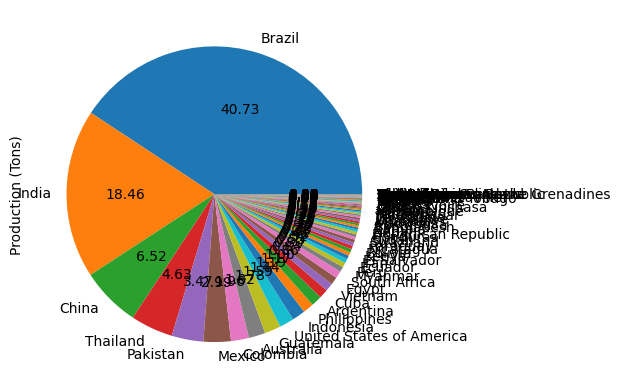

In [211]:
df_new['Production (Tons)'].plot(kind='pie',autopct='%0.2f')

<Axes: >

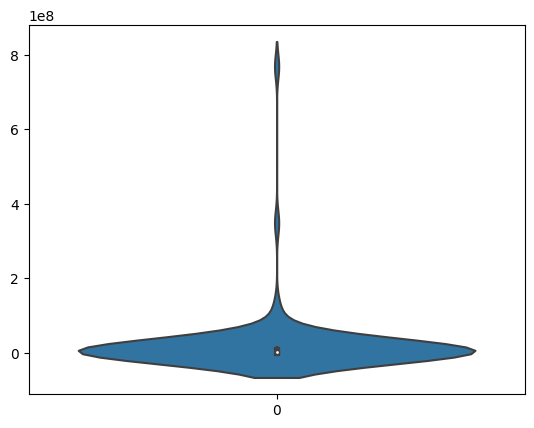

In [220]:
sns.violinplot(df_new['Production (Tons)'])

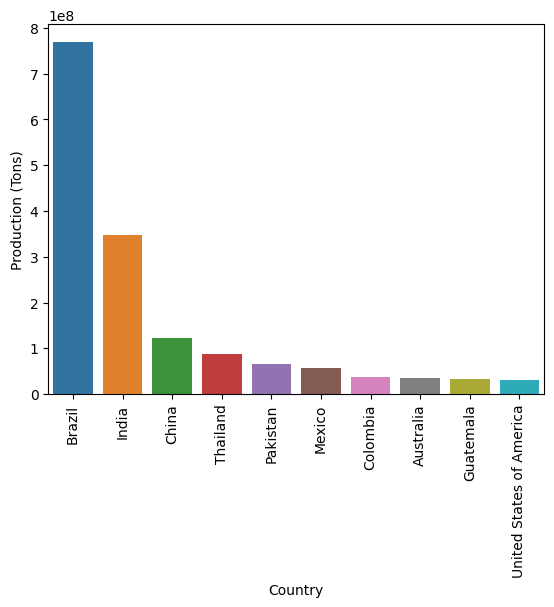

In [246]:
ax=sns.barplot(x='Country',y='Production (Tons)',data=df.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

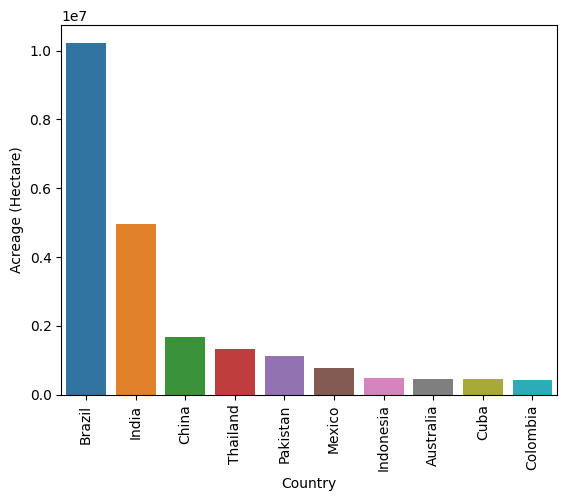

In [252]:
df_acr=df.sort_values(by='Acreage (Hectare)',ascending=False)
ax=sns.barplot(x='Country',y='Acreage (Hectare)',data=df_acr.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

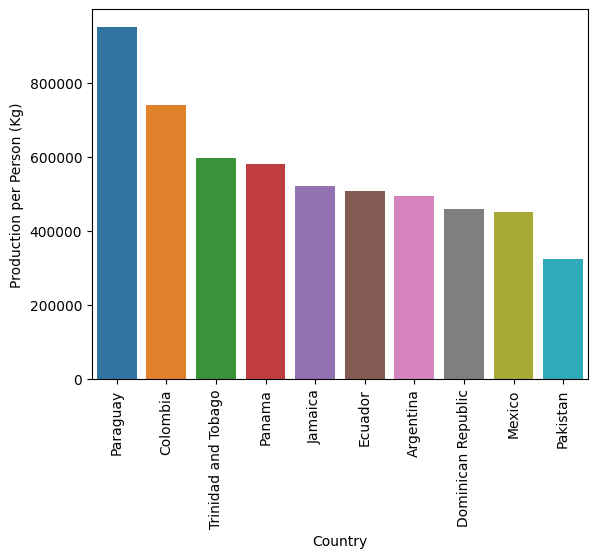

In [256]:
df_per_person=df.sort_values(by='Production per Person (Kg)',ascending=False)
ax=sns.barplot(x='Country',y='Production per Person (Kg)',data=df_per_person.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

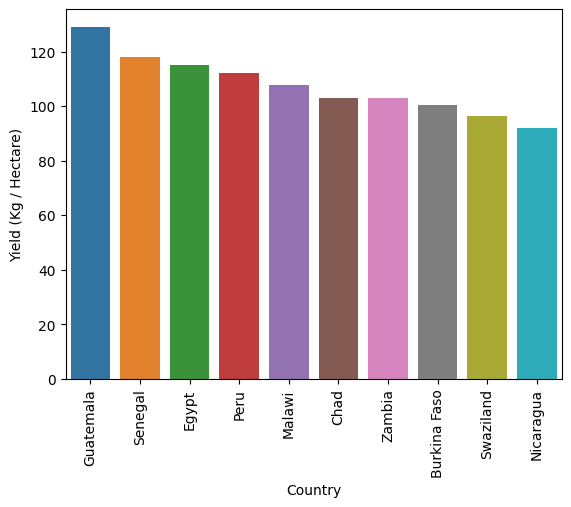

In [259]:
df_Yield =df.sort_values(by='Yield (Kg / Hectare)',ascending=False)
ax=sns.barplot(x='Country',y='Yield (Kg / Hectare)',data=df_Yield.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

<Axes: >

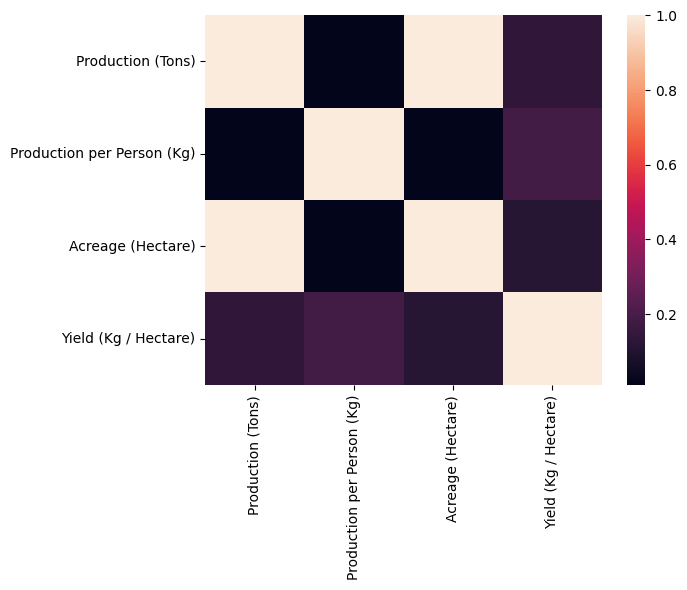

In [265]:
corr=df_new.corr()
sns.heatmap(corr)

<Axes: xlabel='Production (Tons)', ylabel='Acreage (Hectare)'>

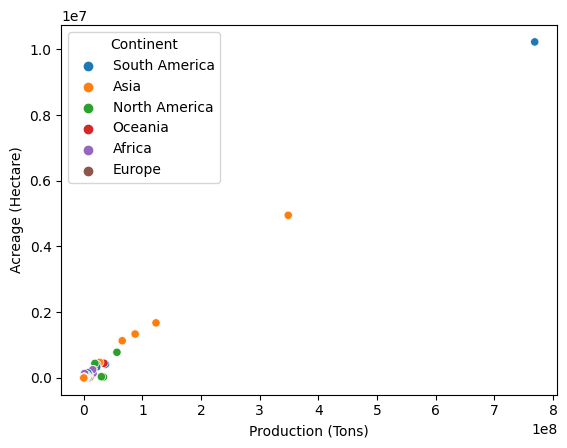

In [274]:
sns.scatterplot(x='Production (Tons)',y='Acreage (Hectare)',hue='Continent',data=df)

<Axes: xlabel='Production per Person (Kg)', ylabel='Acreage (Hectare)'>

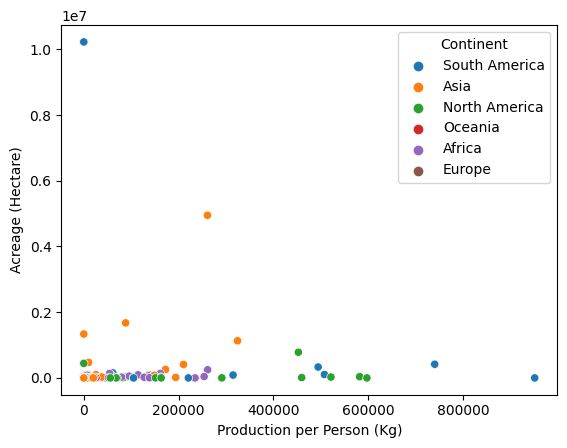

In [276]:
sns.scatterplot(x='Production per Person (Kg)',y='Acreage (Hectare)',hue='Continent',data=df)

In [281]:
df['Continent'].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

In [321]:
df_continent=df.groupby('Continent').sum()
#df_continent.drop('Country',axis=1,inplace=True)
df_continent['sum_of_contries']=df.groupby('Continent').count()['Country']
df_continent.drop('Country',axis=1,inplace=True)


<Axes: ylabel='Production (Tons)'>

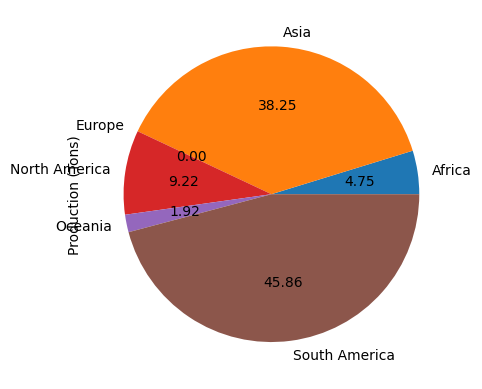

In [322]:
df_continent['Production (Tons)'].plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Continent', ylabel='Production (Tons)'>

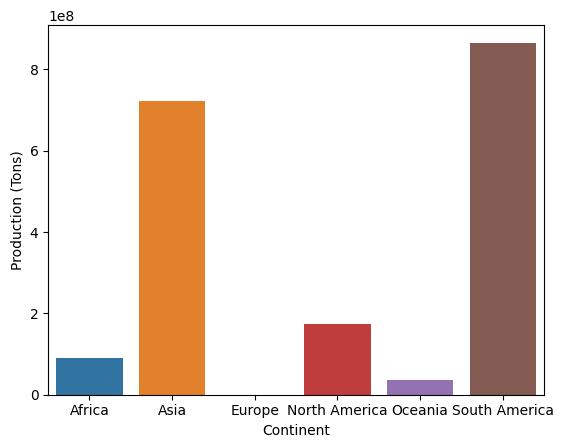

In [320]:
df_temp=df_continent.reset_index()
sns.barplot(x='Continent',y='Production (Tons)',data=df_temp)

<Axes: xlabel='sum_of_contries', ylabel='Production (Tons)'>

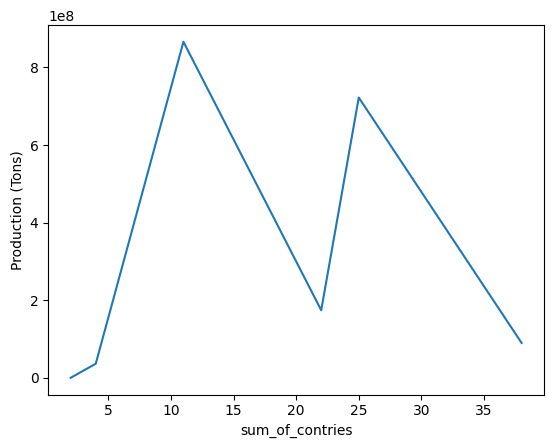

In [324]:
sns.lineplot(x='sum_of_contries',y='Production (Tons)',data=df_continent)

<Axes: >

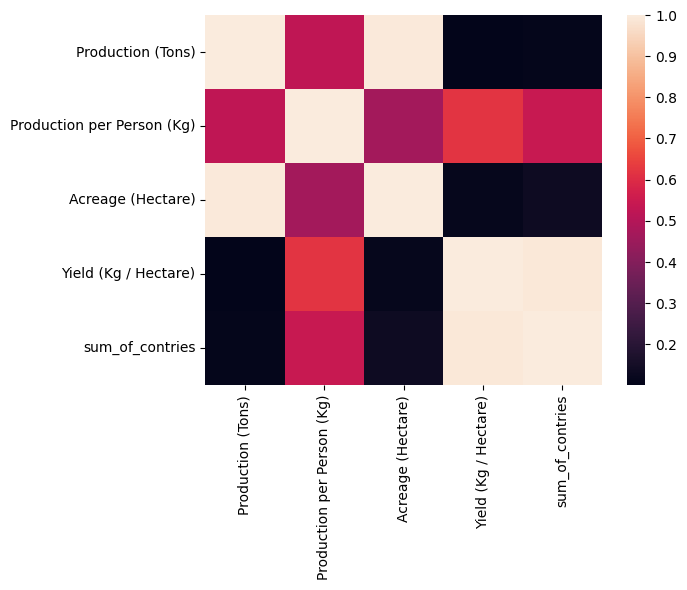

In [326]:
sns.heatmap(df_continent.corr())